In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('News.csv',index_col=0)

In [3]:
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
df.shape

(44919, 5)

In [5]:
data = df.drop(["title", "subject","date"], axis = 1)
data

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [6]:
data.isna().sum()

text     0
class    0
dtype: int64

In [7]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 

<AxesSubplot:xlabel='class', ylabel='count'>

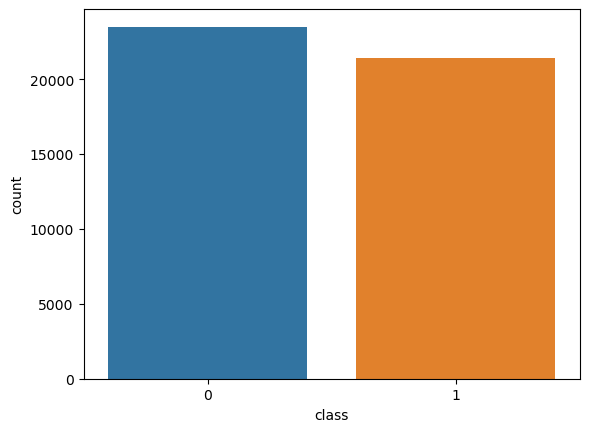

In [8]:
sns.countplot(data=data, 
              x='class',order=data['class'].value_counts().index)

In [9]:
!pip install nltk

In [10]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ygred\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ygred\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ygred\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
'''
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    #remove lower text
    text = text.lower()
    text = re.sub('\[.*?\]'," ",text)
    text = re.sub('[%s]'," ",text)
    # Remove all comments.
    text = re.sub(r"(?://.*)|(?:/\*(?:.|\n)*?\*/)", "",text)

    # Remove web links
    text = re.sub(r'http?;//\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove all special characters except for spaces and alphanumeric characters.
    text = re.sub(r"[^\s\w\@\()\#\%]", "", text)
    
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join(word for word in text.split() if word not in stopwords)

    # Stem the words
    stemmer = nltk.PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    
    #lemmatization the words
    lemmatizer = nltk.WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    # Remove all words that are not in the English language dictionary.
    dictionary = nltk.corpus.wordnet.words()
    text = ' '.join([word for word in text.split() if word in dictionary])
    return text '''

'\ndef clean_text(text):\n    # Remove HTML tags\n    text = re.sub(r\'<[^>]+>\', \'\', text)\n    #remove lower text\n    text = text.lower()\n    text = re.sub(\'\\[.*?\\]\'," ",text)\n    text = re.sub(\'[%s]\'," ",text)\n    # Remove all comments.\n    text = re.sub(r"(?://.*)|(?:/\\*(?:.|\n)*?\\*/)", "",text)\n\n    # Remove web links\n    text = re.sub(r\'http?;//\\S+|www\\S+|https\\S+\', \'\', text)\n\n    # Remove special characters, punctuation marks, and newlines\n    text = re.sub(r\'[^a-zA-Z\\s]\', \'\', text)\n\n    # Remove all special characters except for spaces and alphanumeric characters.\n    text = re.sub(r"[^\\s\\w\\@\\()\\#\\%]", "", text)\n    \n    # Remove stopwords\n    stopwords = nltk.corpus.stopwords.words(\'english\')\n    text = \' \'.join(word for word in text.split() if word not in stopwords)\n\n    # Stem the words\n    stemmer = nltk.PorterStemmer()\n    text = \' \'.join(stemmer.stem(word) for word in text.split())\n    \n    #lemmatization the words

In [13]:
#data['text'] = data['text'].apply(clean_text)
#data['text'].head()

In [14]:
#data.iloc[2]['text']

In [15]:
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = text.lower()
    text = re.sub('\[.*?\]'," ",text)
    text = re.sub('[%s]'," ",text)
    # Remove all comments.
    text = re.sub(r"(?://.*)|(?:/\*(?:.|\n)*?\*/)", "",text)

    # Remove web links
    text = re.sub(r'http?;//\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove all special characters except for spaces and alphanumeric characters.
    text = re.sub(r"[^\s\w\@\()\#\%]", "", text)
    # Remove stopwords
    stopwords = ["the", "and", "is", "on", "in", "if", "for", "a", "an", "of", "or", "to", "it", "you", "your"]
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    return text
    

In [16]:
texts = [
    "\nMore\nI can't make any       real sugges%%%%%tions on improvement - I wondered if the section statistics should b|e later on, or a subsect\nion of 'types of accidents'  -I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport"
]
cleaned_texts = [clean_text(text) for text in texts]
print(cleaned_texts)

['more i cant make any real ugge tion improvement i wondered ection tati tic hould be later ub ect ion type accident i think reference may need tidying o that they are all exact ame format ie date format etc i can do that later noone el e doe fir t have any preference formatting tyle reference want do elf plea e let me know there appear be backlog article review o i gue there may be delay until reviewer turn up li ted relevant form eg wikipediagoodarticlenomination tran port']


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44919 non-null  object
 1   class   44919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 702.0+ KB


In [18]:
data['text'] = data['text'].apply(clean_text)
data['text'].head()

0    her hu band over ea military he home working l...
1    corporate pon like coke hould think again befo...
2    we have very few favorite when come reporting ...
3    republican war poor people ha been killing ame...
4    thank goodne omeone i clo ing down freefor all...
Name: text, dtype: object

In [19]:
data.iloc[2]['text']

'we have very few favorite when come reporting obviou rea they lie all time who ha n t read heard omething totally fal e about trump ru ia thi pa t week wa banner week lie from main tream media o our plea ure traighten thing out everyone we ve di covered tar new reporting organization that tand above mo t other their reporting trumpru ia inve tigation circa new with ara carter john olomon are etting record traighthere kinny late t media lie truth via circaaggre ive new reporting can be public ervice like when courageou journali t expo ed richard nixon watergate catholic church cover up exual abu e u intelligence failure that preceded but breathle halfbaked reporting time tumult can al o mi erve public like when wall treet journal retracted fal e tory that bill clinton had been een compromi ing po ition with intern white hou e when nbc wrongly identified richard jewell olympic park bombing u pectthi pa t week profe ional journali m offered u everal new example breathle reporting during 

In [20]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

In [21]:
target_label= [col for col in data.columns if data[col].dtypes == 'int64']
target_label

['class']

In [22]:
data[data['class'] == 1]['text'].describe()

count                                                 21417
unique                                                21033
top       reuter highlight u pre ident donald trump admi...
freq                                                      8
Name: text, dtype: object

In [23]:
data[data['class'] == 0]['text'].describe()

count     23502
unique    17393
top            
freq        637
Name: text, dtype: object

In [24]:
data['text'].head(100)

0     her hu band over ea military he home working l...
1     corporate pon like coke hould think again befo...
2     we have very few favorite when come reporting ...
3     republican war poor people ha been killing ame...
4     thank goodne omeone i clo ing down freefor all...
                            ...                        
95    dubai reuter fighter loyal armed houthi moveme...
96    i n t much ecret e day that rich people do not...
97    immediately following election few lefti t de ...
98    eag new wyoming high chool i under fire after ...
99    thi anniver ary roe v wade i o important ameri...
Name: text, Length: 100, dtype: object

In [25]:
from wordcloud import WordCloud, STOPWORDS

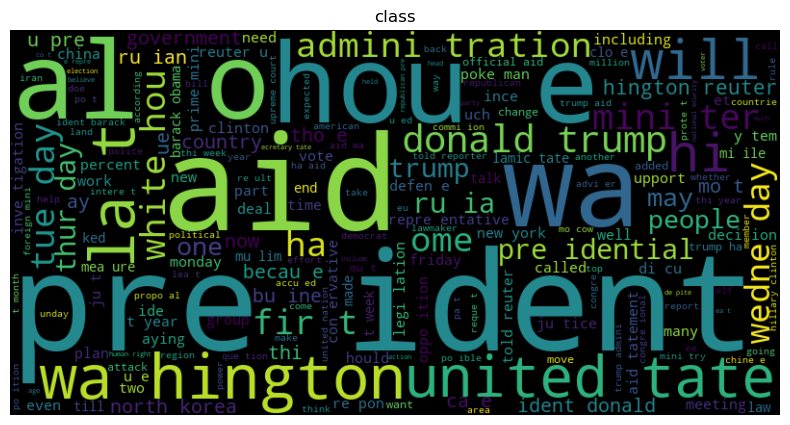

In [26]:
# Plot word clouds for each target label
for label in target_label:
    text = ' '.join(data[data[label] == 1]['text'].head(10000).values)
    generate_wordcloud(text,Title=label)
    plt.show()

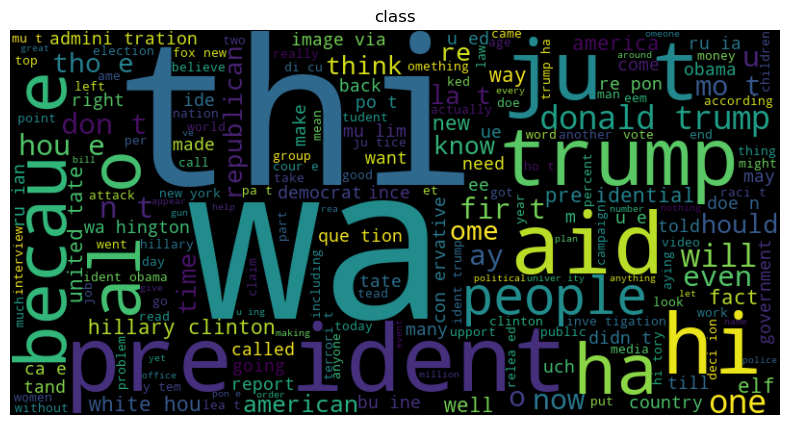

In [27]:
# Plot word clouds for each target label
for label in target_label:
    text = ' '.join(data[data[label] == 0]['text'].head(10000).values)
    generate_wordcloud(text,Title=label)
    plt.show()

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

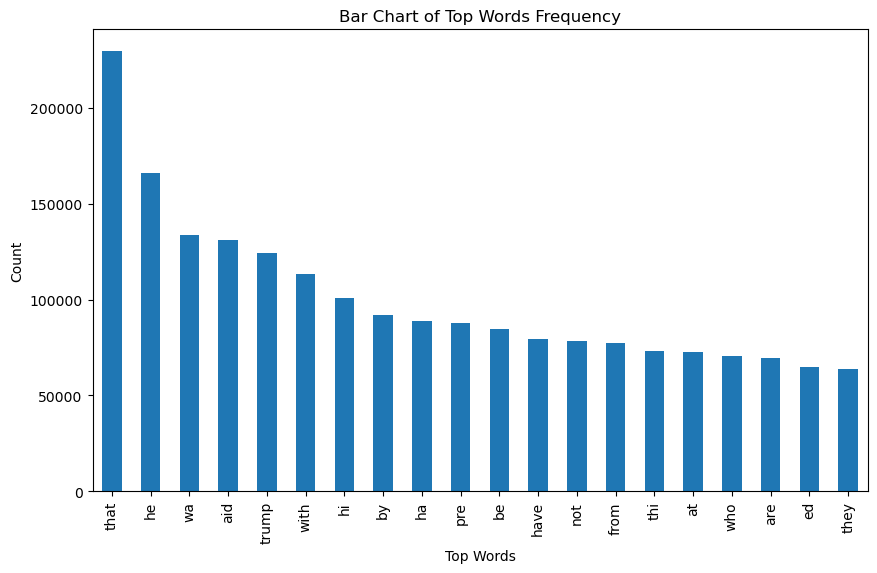

In [124]:
from sklearn.feature_extraction.text import CountVectorizer 

def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 


In [31]:
y = data['class']

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer   
cv = TfidfVectorizer() 
X =cv.fit_transform(data['text'])

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
  
x_train, x_test, y_train, y_test = train_test_split(X,y,  
                                                    test_size=0.25)

In [33]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33689, 146310), (33689,), (11230, 146310), (11230,))

In [34]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(class_weight='balanced',random_state = 12) 
model.fit(x_train, y_train) 

LogisticRegression(class_weight='balanced', random_state=12)

In [35]:
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test)))

0.9908575499421176
0.985040071237756


In [36]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test, model.predict(x_test)))
print(metrics.classification_report(y_test, model.predict(x_test)))

[[5757   86]
 [  82 5305]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5843
           1       0.98      0.98      0.98      5387

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230



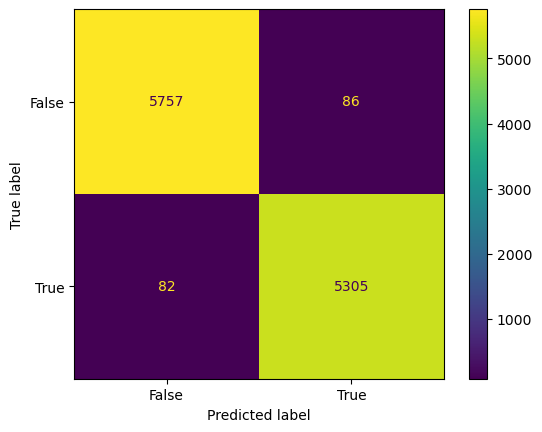

In [37]:
# Confusion matrix of Results from Decision Tree classification 
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=[False, True]) 
  
cm_display.plot() 
plt.show() 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 

In [ ]:
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

In [41]:
import pickle
# Open a file where you want to store the data
filename = 'fake_news_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [161]:
!pip install -U scikit-learn

     ---------------------------------------- 9.3/9.3 MB 17.6 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [48]:
!pip install joblib

In [1]:
%%writefile data_processor.py
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import  train_test_split

# Read data from path
def prepare_data(path_to_data):
    data = pd.read_csv(path_to_data)
    X = data['text']
    y = data['class']
    return {'text' : X,'class' : y}


def create_train_test_data(X,y,test_size,random_state):
    cv = TfidfVectorizer()
    X = cv.fit_transform(X)
    X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                       test_size =test_size,random_state = random_state)
    return {'X_train':X_train,'X_test':X_test,
           'y_train':y_train,'y_test':y_test},cv


Overwriting data_processor.py


In [2]:
%%writefile model_trainer.py
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


def run_model_training(X_train,X_test,y_train,y_test):
    log = LogisticRegression()
    log.fit(X_train,y_train)
    log.score(X_test,y_test)
    y_pred = log.predict(X_test)
    print(classification_report(y_test,y_pred))
    return log

Overwriting model_trainer.py


In [3]:
%%writefile train_model.py
path_to_data = 'News.csv'

#1.Prepare the data
prepared_data = dp.prepare_data(path_to_data)

#2.Create train -test split
train_test_data,vectorizer = dp.create_train_test_data(prepared_data['text'],
                                                      prepared_data['class'],
                                                      0.33,2023)

#3.Runtraining
model = mt.run_model_training(train_test_data['X_train'],train_test_data['X_test'],
                             train_test_data['y_train'],train_test_data['y_test'])



#save the trained model and vectorizer
joblib.dump(model,'my_fake_news.pkl')
joblib.dump(cv,'my_vectorizer_news.pkl')



Overwriting train_model.py


In [4]:
#save the trained model and vectorizer
import joblib
#joblib.dump(model,'my_fake_news.pkl')
#joblib.dump(cv,'my_vectorizer_news.pkl')

NameError: name 'model' is not defined

In [5]:
%%writefile NewsDetectionapp.py
from streamlit import success
import streamlit as st
import joblib

# Load the model
news_log = joblib.load(open('my_fake_news.pkl', 'rb'))
# Load Vectorizer
vectorizer = joblib.load(open('my_vectorizer_news.pkl', 'rb'))
# Main function
def main():
    st.title("Fake News Detection System")
    text_message = st.text_input("Enter your News")
    if st.button("Detect"):
        if text_message:
            prediction = news_log.predict(vectorizer.transform([text_message]))
                       
            if prediction[0] == 1:
                info = "Fake News"
            else:
                info = "Not a Fake News"
            st.success('News: {}'.format(info))

# Run the Streamlit app
if __name__ == '__main__':
    main()


Overwriting NewsDetectionapp.py


In [1]:
from streamlit import success


In [ ]:
!streamlit run NewsDetectionapp.py

In [73]:
import sys
print(sys.path)


['C:\\Users\\ygred\\OneDrive - microsoft\\Desktop\\Excelr\\Github Project\\Fake news classification', 'C:\\Users\\ygred\\anaconda3\\python39.zip', 'C:\\Users\\ygred\\anaconda3\\DLLs', 'C:\\Users\\ygred\\anaconda3\\lib', 'C:\\Users\\ygred\\anaconda3', '', 'C:\\Users\\ygred\\anaconda3\\lib\\site-packages', 'C:\\Users\\ygred\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\ygred\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\ygred\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\ygred\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\ygred\\.ipython']


In [134]:
!pip install streamlit

In [5]:
import pickle
with open('fake_news_model.pkl', 'rb') as fakenews:
    model = pickle.load(fakenews)

In [6]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, model.predict(x_test)))
print(metrics.classification_report(y_test, model.predict(x_test)))

NameError: name 'y_test' is not defined

In [140]:
#%%writefile fakenew.py


In [163]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

text = input("Enter the news that you want to predict: ")
print("You entered: " + str(text))

# Load the TF-IDF vectorizer used during training
with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorization = pickle.load(vectorizer_file)

# Re-fit the vectorizer with the training data
# Assuming x_train is your training data
vectorization.fit_transform(x_train)

# Preprocess the input text using the fitted vectorizer
text_vectorized = vectorization.transform([text])

def News(text_vectorized):
    model = pickle.load(open('fake_news_model.pkl', 'rb'))
    prediction = model.predict(text_vectorized)
    return print("The given statement is", prediction[0])

if __name__ == '__main__':
    News(text_vectorized)


Enter the news that you want to predict: Tomorrow is holiday
You entered: Tomorrow is holiday


AttributeError: lower not found

In [67]:
import streamlit as st
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the trained model and CountVectorizer
with open('classification.pkl', 'rb') as model_file, open('vectorizer.pkl', 'rb') as vectorizer_file:
    model = pickle.load(model_file)
    vectorizer = pickle.load(vectorizer_file)

# Create a Streamlit web app
st.title("Toxic  Comment Classification")

# Create a text input field for user comments
user_input = st.text_area("Enter your comment here:")

# Create a "Predict" button
if st.button("Predict"):
    if user_input:
        # Preprocess the user's input text using the loaded CountVectorizer
        user_input_cv = vectorizer.transform([user_input])

        # Make predictions using the loaded model
        predictions = model.predict(user_input_cv)

        # Create a dictionary to map the labels to their respective names
        label_names = {
            0: 'Toxic',
            1: 'Severe Toxic',
            2: 'Obscene',
            3: 'Threat',
            4: 'Insult',
            5: 'Identity Hate'
        }

        # Display the predicted labels
        st.subheader("Predicted Labels:")
        for i, label_id in enumerate(label_names):
            label_name = label_names[label_id]
            prediction = "Yes" if predictions[0, i] == 1 else "No"
            st.write(f"{label_name}: {prediction}")

# Run the Streamlit app
if __name__ == '__main__':
    st.set_option('deprecation.showfileUploaderEncoding', False)
    st.set_option('deprecation.showPyplotGlobalUse', False)

FileNotFoundError: [Errno 2] No such file or directory: 'classification.pkl'